# Wordcloud

In [1]:
!pip install wordcloud

     |████████████████████████████████| 159 kB 13.4 MB/s eta 0:00:01


In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
def directory_data(directory) :
    data = {}
    data['review'] = []
    
    for file_path in os.listdir(directory) :
        with open(os.path.join(directory, file_path), 'r' , encoding = 'utf-8') as file :
            data['review'].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [6]:
def data(directory) :
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df], axis = 0)

In [8]:
data_set = '/Users/kimhyunjo/.keras/datasets/imdb.tar.gz'

In [9]:
train_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))

In [10]:
review = train_df['review']

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [11]:
wordcloud = WordCloud(stopwords = STOPWORDS, width = 800, height = 600)
wordcloud.generate(' '.join(review))

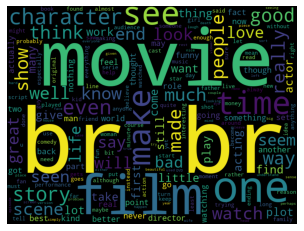

In [14]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## seaborn 을 이용한 pos, neg 갯수 분석

In [16]:
!pip install seaborn

     |████████████████████████████████| 292 kB 12.4 MB/s eta 0:00:01


In [17]:
import seaborn as sns

In [19]:
sentiment = train_df['sentiment'].value_counts()
sentiment

1    12500
0    12500
Name: sentiment, dtype: int64

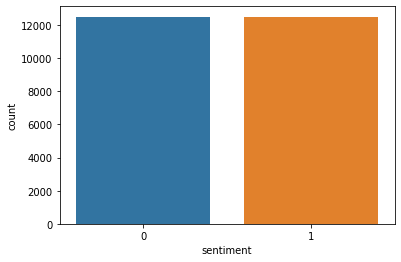

In [20]:
fig, axe = plt.subplots(ncols = 1)
sns.countplot(x = 'sentiment', data = train_df)
plt.show()